In [2]:
# realização dos imports

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler, minmax_scale

In [3]:
# carregamento dos dados filtrados

data = np.load("datasets/processed/OpenBCI_GUI-v5-meditation/10x_filtered.npy")
data.shape

(8, 175952)

In [4]:
# determinação das faixas de frequências para cada rítmo
delta = (0, 4)
theta = (4, 8)   # meditação, imaginação e criatividade
alpha = (8, 12)  # relaxamento e alerta, mas não focados em algo; calma, criatividade e meditação
beta = (12, 30)  # alerta e foco em atividade específica
gamma = (30, 100)

# determinação das faixas de frequências específicas da onda Beta
beta1 = (12, 15) # foco moderado, aparece em leitura, escrita, etc
beta2 = (15, 20) # foco intenso, aparece quando solucionamos problemas e tomada de decisões
beta3 = (20, 30) # estresse e ansiedade, atividades mentais excessivas e hiperatividade

In [5]:
f, Pxx = welch(data)
f.shape, Pxx.shape

((129,), (8, 129))

### Próximos passos:

1. Plotar o PSD Welch geral;
2. Enquadrar os valores de frequências para cada rítmo;
3. Plotar gráfico de barras
4. Mapear em uma escala linear (utilizando minmax_scale) e plotar novamente o gráfico de barras.

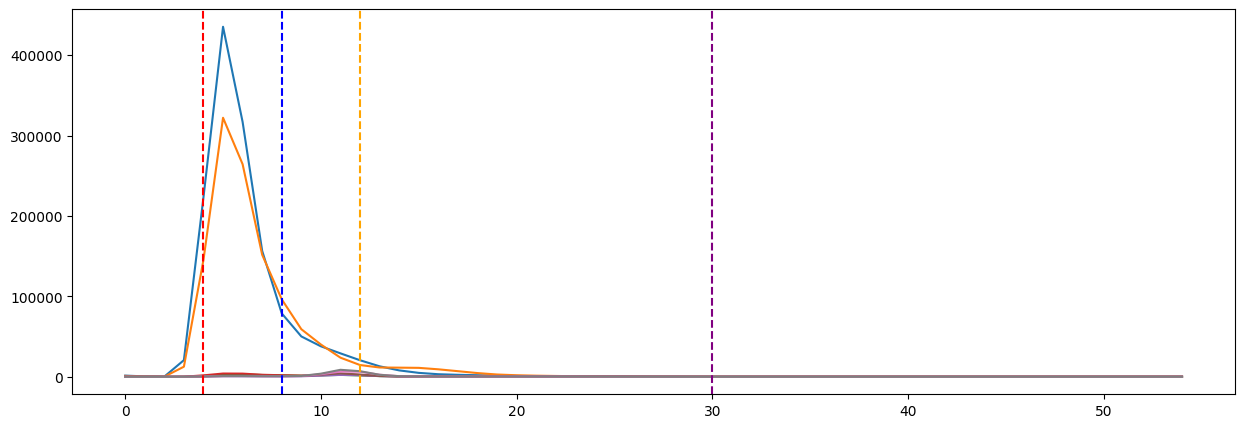

In [6]:
rcParams['figure.figsize'] = [15., 5.]

# tarefa 1)
def my_plot(data):
    if len(data.shape) == 1:
        plt.plot(data[:55])
    else:
        for ch in range(data.shape[0]):
            plt.plot(data[ch,:55])
    plt.axvline(x=4, linestyle='--', color='red')
    plt.axvline(x=8, linestyle='--', color='blue')
    plt.axvline(x=12, linestyle='--', color='orange')
    plt.axvline(x=30, linestyle='--', color='purple')

my_plot(Pxx)

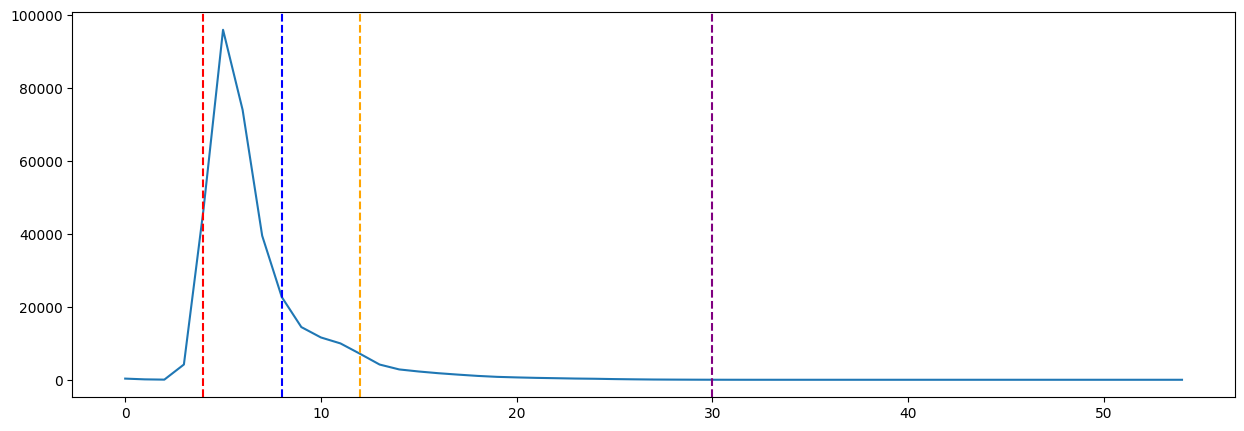

In [7]:
# aplicando a média para todos os eletrodos
X = np.average(Pxx, axis=0)
my_plot(X)

# tarefa 2)
# separa conjunto de dados em cada rítmo
features = list()
for mi, ma in [delta, theta, alpha, beta, gamma]:
    features.append(X[mi:ma])
features = [np.average(f) for f in features]
y = ('delta', 'theta', 'alpha', 'beta', 'gamma')

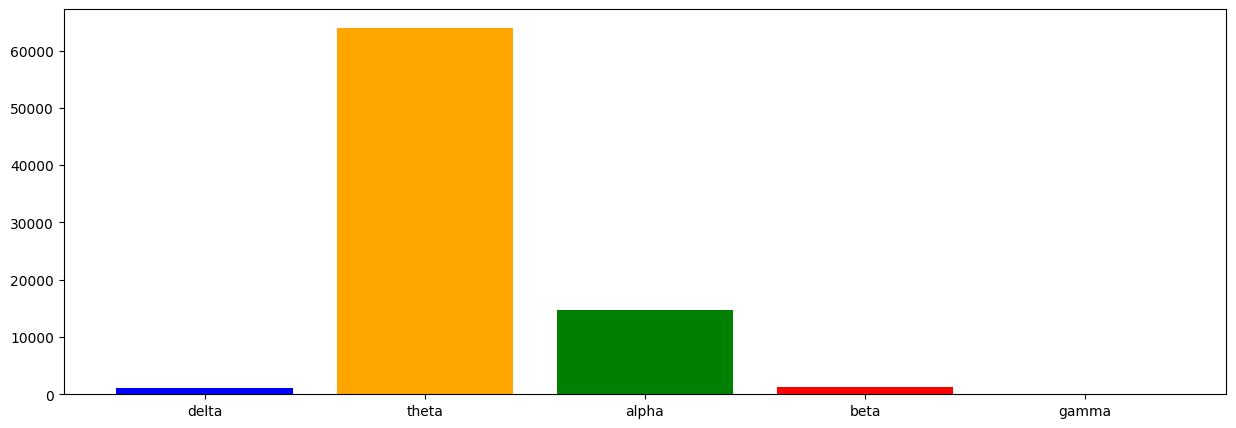

In [8]:
# tarefa 3)
def plot_bar(x, y):
    colors = ('blue', 'orange', 'green', 'red', 'purple')
    plt.bar(x, y, color=colors)

plot_bar(y, features)

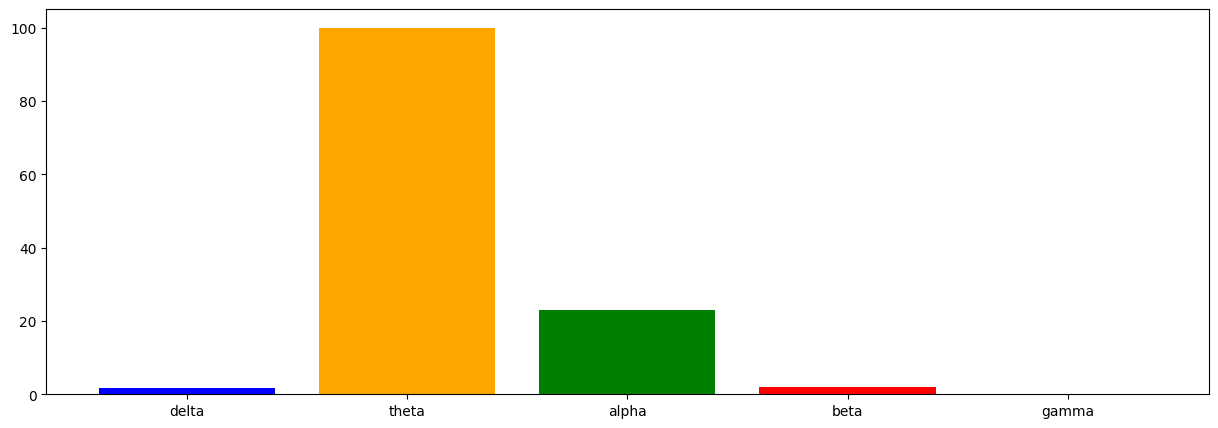

In [9]:
# tarefa 4)
feat_norm = minmax_scale(features, feature_range=(0, 100))
plot_bar(y, feat_norm)

### Passos finais (trabalho):

**Objetivo**: fornecer os valores (obtido nos passos anteriores) ao longo do tempo
- para fazer isso, deve ser simulado o experimento *online* com buffer
- fornecer os dados atualizados a cada N segundos, informando o momento (máximo)
- os dados devem ser salvos em um arquivo para que seja analisado posteriormente (geração de gráficos, estatíticas, etc)
    
**Produto gerado**: oferecer uma função totalmente parametrizável. Os dados de entrada incluem:
- arquivo de análise
- taxa de amostragem
- tempo (em segundos, `float`) de atualização
- dado em escala? (Padrão `False` ou `float`)
- tipo de saída: csv